In [142]:
import numpy as np
import random
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
indice_chr=65

In [2]:
def generar_data_para_kmeans(rectangulos):
  data=[]
  for i in range(len(rectangulos)):
    data.append(rectangulos[i].centro_gravedad())
  return data

In [35]:
def sub_nodos(nodote_rectangulos):
  roo=generar_data_para_kmeans(nodote_rectangulos)
  kmeans = KMeans(n_clusters=2, random_state=0, n_init="auto").fit(roo)
  etiquetas=kmeans.labels_
  centroides=kmeans.cluster_centers_
  return etiquetas

In [36]:
class rectangulo:
    def __init__(self, x1, y1, x2, y2):
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
    def centro_gravedad(self):
        return ((self.x1+self.x2)/2,(self.y1+self.y2)/2)

In [37]:
def encontrar_extremo(tipo_coordenada,arreglo_rectangulo):
    if tipo_coordenada=="x1":
        valor=arreglo_rectangulo[0].x1
        indice=0
        for i in range(len(arreglo_rectangulo)):
            if valor>arreglo_rectangulo[i].x1:
                indice=i
                valor=arreglo_rectangulo[i].x1
        return valor
    if tipo_coordenada=="x2":
        valor=arreglo_rectangulo[0].x2
        indice=0
        for i in range(len(arreglo_rectangulo)):
            if valor<arreglo_rectangulo[i].x2:
                indice=i
                valor=arreglo_rectangulo[i].x2
        return valor
    if tipo_coordenada=="y1":
        valor=arreglo_rectangulo[0].y1
        indice=0
        for i in range(len(arreglo_rectangulo)):
            if valor>arreglo_rectangulo[i].y1:
                indice=i
                valor=arreglo_rectangulo[i].y1
        return valor
    if tipo_coordenada=="y2":
        valor=arreglo_rectangulo[0].y2
        indice=0
        for i in range(len(arreglo_rectangulo)):
            if valor<arreglo_rectangulo[i].y2:
                indice=i
                valor=arreglo_rectangulo[i].y2
        return valor

In [38]:
N = 10
dentro_final=[]
dentro_final.append(rectangulo(1,1,2,2))
dentro_final.append(rectangulo(3,2,5,4))
dentro_final.append(rectangulo(8,2,10,3))

dentro_final.append(rectangulo(15,1,18,4))
dentro_final.append(rectangulo(10,1,11,6))
dentro_final.append(rectangulo(1,10,3,13))
dentro_final.append(rectangulo(16,16,21,23))
dentro_final.append(rectangulo(22,24,27,30))
dentro_final.append(rectangulo(8,8,15,15))
dentro_final.append(rectangulo(1,18,3,25))

In [71]:
class nodito:
    def __init__(self, nombre):
        self.nombre=nombre
        self.hijo=None
    def insertar_hijo(self,elementos):
        self.hijo=(nodo_grande(elementos))
        print("Nodote insertado")
    def tipo(self):
        return "nodito"

In [72]:
class nodo_grande:
    def __init__(self,elementos):
        self.elementos=elementos
        self.rect_nodote=rectangulo(encontrar_extremo("x1",elementos),encontrar_extremo("y1",elementos),
                                    encontrar_extremo("x2",elementos),encontrar_extremo("y2",elementos))
        self.noditos=[]
    def insertar_noditos(self,nombre):
        self.noditos.append(nodito(nombre))
        print("nodito insertado")
    def tipo(self):
        return "nodote"

In [204]:
class rtree:
    def __init__(self,maximo_hijos,profundidad_total,elementos):
        self.raiz=nodo_grande(elementos)
        self.max_num=maximo_hijos
        self.profundidad_propuesta=profundidad_total
            
    def insertar_dentro_nodo_grande(self,nodo_grande_actual, nombre, datos):
        if len(nodo_grande_actual.noditos)<self.max_num:
            nodo_grande_actual.insertar_noditos(nombre,datos)
    
    def insertar_rtree(self, nodo):
        print("ta entrando ")
        if nodo.tipo()=="nodote":
            if len(nodo.elementos)>=self.max_num:
                dispersa=sub_nodos(nodo.elementos)
                dispersa=[dispersa[i] for i in range(len(dispersa))]
                print("dispersa: ",dispersa)
                verifica=0
                for i in range(self.max_num):
                    if dispersa.count(i)<self.max_num and dispersa.count(i)!=0:
                    #if dispersa.count(i)==0:
                        verifica=1
                if verifica==0:
                    for i in range(self.max_num):
                        if dispersa.count(i)!=0:
                            elementos_usables=[]
                            for j in range(len(dispersa)):
                                if dispersa[j]==i:
                                    elementos_usables.append(nodo.elementos[j])
                            nodo.insertar_noditos("a")
                            nodo.noditos[i].insertar_hijo(elementos_usables)
                            self.insertar_rtree(nodo.noditos[i].hijo)
                            

    def recorrido_rtree(self,nodo,nivel):
        print("nivel_____________________________ :",nivel)
        if len(nodo.noditos)!=0:
            for i in range(len(nodo.noditos)):
                self.recorrido_rtree(nodo.noditos[i].hijo,nivel+1)
        else:
            print("nivel: ",nivel,"elementos here!",len(nodo.elementos))


    def pintar_rectangulo(self,nodo,ax,nivel,c):
        xx1=encontrar_extremo("x1",nodo.elementos)
        yy1=encontrar_extremo("y1",nodo.elementos)
        xx2=encontrar_extremo("x2",nodo.elementos)
        yy2=encontrar_extremo("y2",nodo.elementos)
        #print(xx1,"-",yy1,"-",xx2,"-",yy2)
        pintura=np.random.randint(10)
        ax.add_patch(Rectangle((xx1,yy1),xx2-xx1,yy2-yy1,color=c[pintura],fill=None,linewidth=4-nivel))
        if len(nodo.noditos)!=0:
            for i in range(len(nodo.noditos)):
                self.pintar_rectangulo(nodo.noditos[i].hijo,ax,nivel+1,c)
    def pintar_cuadro(self,nodo):
        colors=np.random.rand(20)
        cmap=plt.cm.RdYlBu_r
        c=cmap(colors)
        fig = plt.figure()
        ax = fig.add_subplot(111)
        for i in range(N):
            x1=int(nodo.elementos[i].x1)
            y1=int(nodo.elementos[i].y1)
            x2=int(nodo.elementos[i].x2)
            y2=int(nodo.elementos[i].y2)
            
            ax.add_patch(Rectangle((x1,y1),x2-x1,y2-y1,color=c[i]))
        self.pintar_rectangulo(nodo,ax,0,c)

        plt.xlim(-5,35)
        plt.ylim(-5,35)
        plt.show()


        


    

In [205]:
rtree=rtree(2,2,dentro_final)

In [206]:
data_prueba2=[7,6,4,8]
data_prueba=[1,5,6,8]

In [207]:
rtree.insertar_rtree(rtree.raiz)


ta entrando 
dispersa:  [0, 0, 0, 0, 0, 0, 1, 1, 0, 0]
nodito insertado
Nodote insertado
ta entrando 
dispersa:  [0, 0, 0, 0, 0, 1, 0, 1]
nodito insertado
Nodote insertado
ta entrando 
dispersa:  [0, 0, 0, 0, 0, 1]
nodito insertado
Nodote insertado
ta entrando 
dispersa:  [0, 1]
nodito insertado
Nodote insertado
ta entrando 
dispersa:  [0, 1]


In [208]:
rtree.recorrido_rtree(rtree.raiz,0)

nivel_____________________________ : 0
nivel_____________________________ : 1
nivel_____________________________ : 2
nivel:  2 elementos here! 6
nivel_____________________________ : 2
nivel:  2 elementos here! 2
nivel_____________________________ : 1
nivel:  1 elementos here! 2


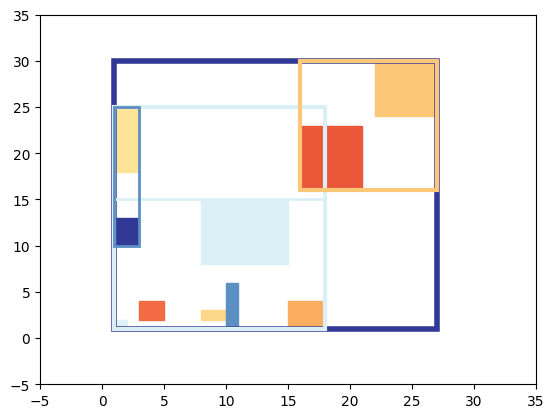

In [210]:
rtree.pintar_cuadro(rtree.raiz)